In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
meat_prices = pd.read_csv("../Data/mla_consumer_meat_prices.csv")
meat_prices

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
1,31/03/2000 0:00,Chicken,486.437172,AUD c/kg
2,31/03/2000 0:00,Lamb,667.593124,AUD c/kg
3,31/03/2000 0:00,Pork,764.927076,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
...,...,...,...,...
367,31/12/2022 0:00,Pork,1375.016743,AUD c/kg
368,31/03/2023 0:00,Beef,2698.082454,AUD c/kg
369,31/03/2023 0:00,Chicken,631.807088,AUD c/kg
370,31/03/2023 0:00,Lamb,2064.750206,AUD c/kg


In [3]:
beef_prices = meat_prices.loc[meat_prices["Category"] == "Beef"]
beef_prices

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
8,30/09/2000 0:00,Beef,1055.871714,AUD c/kg
12,31/12/2000 0:00,Beef,1063.424743,AUD c/kg
16,31/03/2001 0:00,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,31/03/2022 0:00,Beef,2676.767440,AUD c/kg
356,30/06/2022 0:00,Beef,2706.211882,AUD c/kg
360,30/09/2022 0:00,Beef,2711.624305,AUD c/kg
364,31/12/2022 0:00,Beef,2703.489433,AUD c/kg


In [4]:
beef_prices_yearly = beef_prices.copy()
beef_prices_yearly

,Quarterly,Category,Average Value,Units
0,31/03/2000 0:00,Beef,1047.104943,AUD c/kg
4,30/06/2000 0:00,Beef,1072.924397,AUD c/kg
8,30/09/2000 0:00,Beef,1055.871714,AUD c/kg
12,31/12/2000 0:00,Beef,1063.424743,AUD c/kg
16,31/03/2001 0:00,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,31/03/2022 0:00,Beef,2676.767440,AUD c/kg
356,30/06/2022 0:00,Beef,2706.211882,AUD c/kg
360,30/09/2022 0:00,Beef,2711.624305,AUD c/kg
364,31/12/2022 0:00,Beef,2703.489433,AUD c/kg


In [5]:
beef_prices_yearly["Quarterly"] = beef_prices_yearly["Quarterly"].astype("datetime64[ns]")
beef_prices_yearly

,Quarterly,Category,Average Value,Units
0,2000-03-31,Beef,1047.104943,AUD c/kg
4,2000-06-30,Beef,1072.924397,AUD c/kg
8,2000-09-30,Beef,1055.871714,AUD c/kg
12,2000-12-31,Beef,1063.424743,AUD c/kg
16,2001-03-31,Beef,1113.760231,AUD c/kg
...,...,...,...,...
352,2022-03-31,Beef,2676.767440,AUD c/kg
356,2022-06-30,Beef,2706.211882,AUD c/kg
360,2022-09-30,Beef,2711.624305,AUD c/kg
364,2022-12-31,Beef,2703.489433,AUD c/kg


In [6]:
beef_prices_yearly['Year'] = beef_prices_yearly["Quarterly"].dt.strftime("%Y")
beef_prices_yearly

,Quarterly,Category,Average Value,Units,Year
0,2000-03-31,Beef,1047.104943,AUD c/kg,2000
4,2000-06-30,Beef,1072.924397,AUD c/kg,2000
8,2000-09-30,Beef,1055.871714,AUD c/kg,2000
12,2000-12-31,Beef,1063.424743,AUD c/kg,2000
16,2001-03-31,Beef,1113.760231,AUD c/kg,2001
...,...,...,...,...,...
352,2022-03-31,Beef,2676.767440,AUD c/kg,2022
356,2022-06-30,Beef,2706.211882,AUD c/kg,2022
360,2022-09-30,Beef,2711.624305,AUD c/kg,2022
364,2022-12-31,Beef,2703.489433,AUD c/kg,2022


In [7]:
beef_prices_yearly.drop(columns=["Quarterly"])

,Category,Average Value,Units,Year
0,Beef,1047.104943,AUD c/kg,2000
4,Beef,1072.924397,AUD c/kg,2000
8,Beef,1055.871714,AUD c/kg,2000
12,Beef,1063.424743,AUD c/kg,2000
16,Beef,1113.760231,AUD c/kg,2001
...,...,...,...,...
352,Beef,2676.767440,AUD c/kg,2022
356,Beef,2706.211882,AUD c/kg,2022
360,Beef,2711.624305,AUD c/kg,2022
364,Beef,2703.489433,AUD c/kg,2022


In [8]:
final_prices = beef_prices_yearly.groupby("Year").mean(numeric_only=True)
final_prices

,Average Value
Year,
2000,1059.831449
2001,1225.575984
2002,1320.058811
2003,1367.296939
2004,1399.280577
2005,1505.252976
2006,1550.712238
2007,1532.154747
2008,1578.180680


In [9]:
final_prices.reset_index(inplace=True)

In [10]:
final_prices.columns.to_list()

['Year', 'Average Value']

In [11]:
final_prices.dtypes

Year              object
Average Value    float64
dtype: object

In [12]:
final_prices=final_prices.apply(pd.to_numeric, errors="coerce")

In [13]:
final_prices.dtypes

Year               int64
Average Value    float64
dtype: object

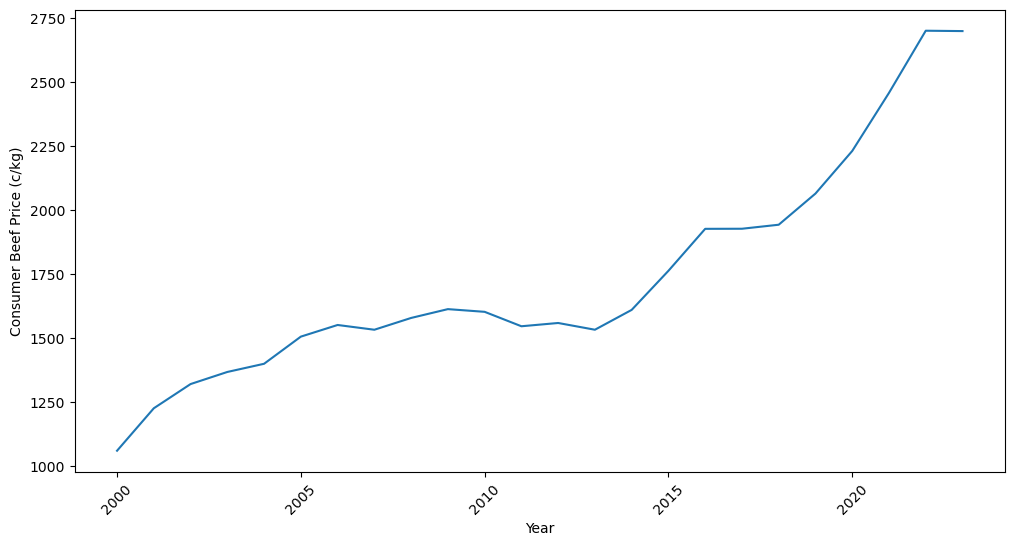

In [14]:
x_values = final_prices["Year"]
y_values = final_prices["Average Value"]
fig = plt.figure(figsize=(12,6))
plt.plot(x_values, y_values)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Consumer Beef Price (c/kg)")
plt.savefig("AUS_consumer_beef_prices.png")
plt.show()

In [15]:
cpi_rates = pd.read_csv("../Data/cpi_rates.csv", encoding="unicode_escape")
cpi_rates

,Year,31 March,30 June,30 September,31 December
0,2023,132.6,-,-,-
1,2022,123.9,126.1,128.4,130.8
2,2021,117.9,118.8,119.7,121.3
3,2020,116.6,114.4,116.2,117.2
4,2019,114.1,114.8,115.4,116.2
5,2018,112.6,113,113.5,114.1
6,2017,110.5,110.7,111.4,112.1
7,2016,108.2,108.6,109.4,110
8,2015,106.8,107.5,108,108.4
9,2014,105.4,105.9,106.4,106.6


In [16]:
cpi_rates = cpi_rates.sort_values(by="Year", ascending=True)
cpi_rates

,Year,31 March,30 June,30 September,31 December
38,1985,37.9,38.8,39.7,40.5
37,1986,41.4,42.1,43.2,44.4
36,1987,45.3,46,46.8,47.6
35,1988,48.4,49.3,50.2,51.2
34,1989,51.7,53,54.2,55.2
33,1990,56.2,57.1,57.5,59
32,1991,58.9,59,59.3,59.9
31,1992,59.9,59.7,59.8,60.1
30,1993,60.6,60.8,61.1,61.2
29,1994,61.5,61.9,62.3,62.8


In [17]:
cpi_rates.columns.to_list()

['Year', '31\xa0March', '30\xa0June', '30\xa0September', '31\xa0December']

In [18]:
cpi_rates.dtypes

Year              int64
31 March        float64
30 June          object
30 September     object
31 December      object
dtype: object

In [19]:
cpi_rates=cpi_rates.apply(pd.to_numeric, errors="coerce")

In [20]:
cpi_rates.dtypes

Year              int64
31 March        float64
30 June         float64
30 September    float64
31 December     float64
dtype: object

In [24]:
dec_cpi = cpi_rates[["Year", "31\xa0December"]]
dec_cpi

,Year,31 December
38,1985,40.5
37,1986,44.4
36,1987,47.6
35,1988,51.2
34,1989,55.2
33,1990,59.0
32,1991,59.9
31,1992,60.1
30,1993,61.2
29,1994,62.8


In [25]:
dec_cpi.reset_index(drop=True, inplace=True)
dec_cpi

,Year,31 December
0,1985,40.5
1,1986,44.4
2,1987,47.6
3,1988,51.2
4,1989,55.2
5,1990,59.0
6,1991,59.9
7,1992,60.1
8,1993,61.2
9,1994,62.8


In [33]:
cpi_change = dec_cpi.pct_change(periods=2)
cpi_change

,Year,31 December
0,NaN,NaN
1,NaN,NaN
2,0.001008,0.175309
3,0.001007,0.153153
4,0.001007,0.159664
5,0.001006,0.152344
6,0.001006,0.085145
7,0.001005,0.018644
8,0.001005,0.021703
9,0.001004,0.044925
